In [ ]:
import os
import shutil

# 정리할 폴더 경로
folder_paths = [
    'C:\\Users\\ohbok\\Taipy\\sparc-malfunction-classification-develop\\src\\.taipy',
    'C:\\Users\\ohbok\\Taipy\\sparc-malfunction-classification-develop\\src\\user_data'
]

for path in folder_paths:
    # 폴더가 존재하는지 확인
    if os.path.exists(path) and os.path.isdir(path):
        try:
            # 폴더 하위의 모든 항목을 순회하며 삭제
            for item in os.listdir(path):
                item_path = os.path.join(path, item)
                if os.path.isdir(item_path):
                    # 하위 폴더인 경우 shutil.rmtree로 삭제
                    shutil.rmtree(item_path)
                else:
                    # 파일인 경우 os.remove로 삭제
                    os.remove(item_path)
            print(f"폴더 '{path}'의 하위 내용이 성공적으로 삭제되었습니다.")
        except OSError as e:
            print(f"폴더 '{path}'의 하위 내용 삭제 중 오류가 발생했습니다: {e}")
    else:
        print(f"폴더 '{path}'가 존재하지 않거나 디렉토리가 아닙니다.")

폴더 'C:\Users\ohbok\Taipy\sparc-malfunction-classification-develop\src\.taipy'가 존재하지 않거나 디렉토리가 아닙니다.
폴더 'C:\Users\ohbok\Taipy\sparc-malfunction-classification-develop\src\user_data'가 존재하지 않거나 디렉토리가 아닙니다.


In [2]:
# 데이터 처리 및 기타 작업을 위한 라이브러리들을 불러옵니다.
import pandas as pd                                         # 데이터프레임 구조를 다루는 데 필수적인 라이브러리
import numpy as np                                          # 숫자 연산을 위한 라이브러리
import datetime as dt                                       # 날짜와 시간을 다루는 라이브러리
import json                                                 # JSON 형식의 데이터를 처리하는 라이브러리

import optuna
import pprint

import taipy as tp
from taipy import Config, Orchestrator, Gui

In [3]:
# # Ensure the orchestrator is stopped before modifying the configuration
# tp.Orchestrator().stop()
# Config.configure_job_executions(mode="standalone", max_nb_of_workers=2)

In [4]:
from config.config import scenario_cfg


In [5]:
tp.Orchestrator().stop()
tp.Orchestrator().run()

[2025-08-19 15:17:12.345][Taipy][INFO] Unblocking configuration update...
[2025-08-19 15:17:12.346][Taipy][INFO] Stopping job dispatcher...
[2025-08-19 15:17:12.346][Taipy][INFO] Orchestrator service has been stopped.
[2025-08-19 15:17:12.347][Taipy][INFO] Updating configuration with command-line arguments...
[2025-08-19 15:17:12.348][Taipy][INFO] Managing application's version...
[2025-08-19 15:17:12.357][Taipy][INFO] Development mode: Clean all entities of version fb70d828-b2aa-4ad9-9f46-cd0e53d9d388
[2025-08-19 15:17:12.380][Taipy][INFO] Checking application's version...
[2025-08-19 15:17:12.386][Taipy][INFO] Blocking configuration update...
[2025-08-19 15:17:12.387][Taipy][INFO] Starting job dispatcher...
[2025-08-19 15:17:12.390][Taipy][INFO] Orchestrator service has been started.


In [6]:
from algos.algos import *

In [7]:
# 디렉토리 변경
# import os
# import subprocess

# # # 파일이 위치한 디렉토리로 이동
# # # 'c:\\my_project'와 같은 경로를 자신의 파일 경로로 바꿔주세요.
# # os.chdir('/usr01/automl/sparc-malfunction-classification-develop/src/config')
# os.chdir('/usr01/automl/sparc-malfunction-classification-develop/src')


In [8]:
# # 'my_script.py' 파일 실행
# # 이 명령어는 Windows의 경우입니다.
# # MacOS나 Linux에서는 'python my_script.py'로 실행할 수 있습니다.
# subprocess.run(['python', 'config.py'])

# # # 특정 경로를 직접 지정하여 실행
# # # 이 방법은 현재 작업 디렉토리를 바꾸지 않고 파일을 실행할 수 있습니다.
# # subprocess.run(['python', 'C:\\Users\\your_name\\Documents\\my_project\\my_script.py'])

In [9]:
# Config.load(r"/usr01/automl/sparc-malfunction-classification-develop/src/config/config.toml")
# scenario_cfg = Config.scenarios["churn_classification"]

scenario_1 = tp.create_scenario(scenario_cfg)

In [10]:
train_parameters_default = scenario_1.train_parameters_list_default.read()
# pprint.pprint(train_parameters_default)

In [11]:
initial_dataset = scenario_1.initial_dataset.read()

In [12]:
print(initial_dataset.shape)
# initial_dataset

(4536, 1625)


In [13]:
task = scenario_1.preprocess_dataset
# task.submit(wait=True, timeout=50)
task.submit(wait=True)

[2025-08-19 15:17:28.514][Taipy][INFO] job JOB_preprocess_dataset_b105a477-fbbf-4b7e-996d-79499ecdb0a3 is completed.


In [14]:
preprocessed_dataset = scenario_1.preprocessed_dataset.read()

In [15]:
print(preprocessed_dataset.shape)
preprocessed_dataset

(4536, 1400)


,X,Y,Radius,AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP,AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP,AC_GAIN_32 of 1103959_69_1133529_cp1p5,AC_GAIN_32 of 1103959_69_1133592_QPP,AC_OFFCALRES of 1103959_69_1133529_cp1,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP,...,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbPo,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbPoPo,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbGbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbGbSbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_PoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_SbPoPo,band gap dpat_ok for band gap,Pass/Fail
0,17,35,38.910153,43,43,43,43,-1.383300,0.7902,-0.6173,...,False,False,False,False,False,False,False,False,False,0
1,19,38,42.485292,43,43,43,43,-1.040700,1.1117,-0.5666,...,False,False,False,False,False,False,True,False,True,0
2,-7,63,63.387696,43,43,43,43,-0.357600,0.4747,-1.7413,...,False,False,False,False,False,False,True,False,False,0
3,13,70,71.196910,43,43,43,43,-0.283700,1.3564,0.0879,...,False,False,False,False,False,False,True,False,True,0
4,33,57,65.863495,43,43,43,43,0.517600,-0.8841,0.2653,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,31,63,70.213959,37,37,37,37,-0.938794,0.6007,-0.2379,...,True,False,False,False,False,False,False,False,True,0
4532,-7,29,29.832868,37,37,37,37,-0.938794,-0.4816,-1.2372,...,True,False,False,False,False,False,False,False,True,0
4533,20,32,37.735925,37,37,37,37,-0.938794,-0.3647,-1.1333,...,True,False,False,False,False,False,False,False,True,0
4534,35,60,69.462220,37,37,37,37,-0.938794,0.4597,-1.6026,...,True,False,False,False,False,False,False,False,True,0


In [16]:
task = scenario_1.create_train_and_test_data
# task.submit(wait=True, timeout=300)
task.submit(wait=True)

[2025-08-19 15:18:01.178][Taipy][INFO] job JOB_create_train_and_test_data_1768a921-929f-42cd-b6c0-eca165e95678 is completed.


In [17]:
train_dataset = scenario_1.train_dataset.read()
print(train_dataset.shape)
test_dataset = scenario_1.test_dataset.read()
print(test_dataset.shape)

(3617, 1267)
(905, 1267)


In [18]:
train_dataset

,X,Y,Radius,AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP,AC_OFFCALRES of 1103959_69_1133529_cp1,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP,AC_OFFCALRES of 1103959_69_1133529_cp1p5,AC_OFFCALRES of 1103959_69_1133592_QPP,AC_OFFCALRES of 1103959_69_JPP,...,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_GbGbSbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_GbSbPoPo_diff,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_GbGbSbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_sum,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_GbGbSbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_diff,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_SbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_GbSbPoPo_sum,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_SbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_GbSbPoPo_diff,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_SbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_sum,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1_cp1p5_YPP_SbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_diff,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_GbSbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_sum,FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_GbSbPoPo_FAILING_BINOUTS(1) of 1103959_69_1133529_cp1p5_SbPoPo_diff,Pass/Fail
3292,7.0,54.0,54.451814,37.0,-0.938794,0.9645,-0.6113,-0.2313,-1.9256,-0.351606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3771,-16.0,39.0,42.154478,37.0,-0.938794,-0.3340,-0.6569,-1.1062,-0.5726,-0.351606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
762,-9.0,38.0,39.051248,43.0,-0.745000,-0.7495,-1.6637,-0.9477,-0.0934,-1.223900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3191,20.0,58.0,61.351447,37.0,-0.938794,-0.1445,-1.4324,-0.2482,-0.1954,-0.351606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2798,20.0,37.0,42.059482,37.0,-0.938794,0.5464,-0.6471,1.6532,0.7051,-0.351606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,19.0,68.0,70.604532,43.0,-1.764800,-0.1122,-1.4072,-0.8413,0.8402,-1.668300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2847,20.0,18.0,26.907248,37.0,-0.938794,1.4495,1.2634,0.7871,-1.5346,-0.351606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2385,28.0,19.0,33.837849,43.0,-1.072100,1.2146,-1.1416,-0.6225,-1.6695,0.123900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
417,-15.0,39.0,41.785165,43.0,-1.273000,-0.3281,-1.3931,0.1533,-1.7805,-0.935300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
split_parameter_info = scenario_1.split_parameter_info.read()
pprint.pprint(split_parameter_info)

{'apply_feature_generation': True,
 'apply_filter_gen': True,
 'apply_filter_split': True,
 'class_distribution_before_sampling': {'0': 3546, '1': 71},
 'corr_threshold_gen': 0.1,
 'corr_threshold_split': 0.98,
 'diff_features': True,
 'features_after_generation': 1266,
 'features_after_split_filter': 789,
 'features_before_split_filter': 1399,
 'features_dropped_by_correlation_split': 608,
 'features_dropped_by_variance_split': 2,
 'final_train_feature_count': 1266,
 'generated_feature_counts': {'diff': 153, 'poly': 189, 'sum': 153},
 'generation_types_applied': ['sum', 'diff', 'poly'],
 'original_feature_count': 789,
 'poly_degree': 2,
 'poly_features': True,
 'random_state': 42,
 'rows_after_outlier_removal': 4522,
 'sampling_applied': 'None',
 'sampling_ratio': None,
 'sum_features': True,
 'test_samples': 905,
 'test_size': 0.2,
 'total_generated_features': 495,
 'train_samples_after_sampling': 3617,
 'train_samples_before_sampling': 3617,
 'var_threshold_gen': 0.0,
 'var_threshol

In [20]:
feature_selector = scenario_1.feature_selector.read()
pprint.pprint(feature_selector)

{'correlation_filter': {'threshold': 0.02},
 'f2_scorer': {'beta': 4, 'name': 'fbeta_score', 'pos_label': 1},
 'feature_selector_name': 'CorrelationsClassifier',
 'variance_threshold_filter': {'threshold': 0}}


In [21]:
task = scenario_1.select_feature
task.submit(wait=True)

[2025-08-19 15:18:06.536][Taipy][INFO] job JOB_select_feature_9578e175-f960-4ee9-958a-d4338577c66c is completed.


In [22]:
feature_selection_info = scenario_1.feature_selection_info.read()
pprint.pprint(feature_selection_info)
# pprint.pprint(feature_selection_info.get('final_feature_count'))

{'correlation_filter': {'threshold': 0.02},
 'f2_scorer': {'beta': 4, 'name': 'fbeta_score', 'pos_label': 1},
 'feature_selector_name': 'CorrelationsClassifier',
 'final_feature_count': 236,
 'final_features': ['Radius',
                    'SensorOffsetHot-Cold',
                    'band gap dpat_ok for band gap',
                    'AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP '
                    'AC_OFFCALRES of 1103959_69_1133529_cp1',
                    'AC_OFFCALRES of 1103959_69_1133529_cp1',
                    'AC_OFFCALRES of 1103959_69_1133529_cp1 AC_OFFCALRES of '
                    '1103959_69_1133529_cp1_cp1p5_YPP',
                    'AC_OFFCALRES of 1103959_69_1133529_cp1 AC_SENSE_CAL of '
                    '1103959_69_1133529_cp1',
                    'AC_OFFCALRES of 1103959_69_1133529_cp1 EEPROM_SET_T2__',
                    'AC_OFFCALRES of 1103959_69_1133529_cp1 KK_LK_OUT_APMU_HI '
                    'of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP',
     

### TASKS train_model

In [23]:
task = scenario_1.train_model_baseline
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_baseline = scenario_1.trained_model_baseline.read()
print(trained_model_baseline)
feature_importance_baseline = scenario_1.feature_importance_baseline.read()
print(feature_importance_baseline.shape)

[2025-08-19 15:18:10.154][Taipy][INFO] job JOB_train_model_baseline_62140446-512d-4ab1-bba8-2a66a6b4b88b is completed.
(3, 3)


In [24]:
# train_parameters_logistic_regression = scenario_1.train_parameters_logistic_regression.read()
# train_parameters_logistic_regression

In [25]:
task = scenario_1.train_model_logistic_regression
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_logistic_regression = scenario_1.trained_model_logistic_regression.read()
print(trained_model_logistic_regression)
feature_importance_logistic_regression = scenario_1.feature_importance_logistic_regression.read()
print(feature_importance_logistic_regression.shape)

[2025-08-19 15:19:29.198][Taipy][INFO] job JOB_train_model_logistic_regression_a55951cf-8fda-4739-ac1f-089729d9f6e5 is completed.
LogisticRegression(C=0.9606699110640047, class_weight={0: 1, 1: 53},
                   max_iter=1000, random_state=42)
(236, 3)


In [26]:
# train_parameters_info_logistic_regression = scenario_1.train_parameters_info_logistic_regression.read()
# pprint.pprint(train_parameters_info_logistic_regression)

In [27]:
# trained_model_logistic_regression
# feature_importance_logistic_regression
# train_parameters_info_logistic_regression

테스트 

In [28]:
# train_parameters_list_default = \
# {'baseline': {'train_model_baseline': {'function_name': 'train_model_baseline',
#                                        'importance_data': {'Features': ['SensorOffsetHot-Cold',
#                                                                         'band '
#                                                                         'gap '
#                                                                         'dpat_ok '
#                                                                         'for '
#                                                                         'band '
#                                                                         'gap',
#                                                                         'Radius'],
#                                                            'Importance': [56.6,
#                                                                           4.65,
#                                                                           96.9]}}},
#  'logistic_regression': {'train_model_logistic_regression': {'class_weight_multiplier': 'len(y) '
#                                                                                         '- '
#                                                                                         'n_pos',
#                                                              'function_name': 'train_model_logistic_regression',
#                                                              'max_iter': 1000,
#                                                              'solver': 'lbfgs'},
#                          'train_parameters_optuna': {'f2_rare_scorer': {'beta': 2,
#                                                                         'name': 'fbeta_score',
#                                                                         'pos_label': 1},
#                                                      'function_name': 'train_model_logistic_regression_optuna',
#                                                      'n_trials': 50,
#                                                      'param_ranges': {'C': [0.0001,
#                                                                             20],
#                                                                       'class_weight_multiplier': [1,
#                                                                                                   20],
#                                                                       'max_iter': 1000,
#                                                                       'solver': ['liblinear',
#                                                                                  'saga']}}},
#  'random_forest': {'train_model_rf_cv': {'class_weight_multiplier': 'len(y) - '
#                                                                     'sum(y)',
#                                          'cv': 3,
#                                          'f2_rare_scorer': {'beta': 2,
#                                                             'name': 'fbeta_score',
#                                                             'pos_label': 1},
#                                          'function_name': 'train_model_rf_cv',
#                                          'param_grid': {'max_depth': [2,
#                                                                       5,
#                                                                       None],
#                                                         'min_samples_split': [2,
#                                                                               5],
#                                                         'n_estimators': [20,
#                                                                          50,
#                                                                          100]},
#                                          'verbose': 1},
#                     'train_model_rf_optuna' : {
#                         'function_name': 'train_model_rf_optuna',
#                         'n_trials': 50,  # Optuna가 시도할 하이퍼파라미터 조합의 수
#                         'cv': 5,         # 교차 검증 폴드 수
#                         'param_ranges': {
#                             'n_estimators': {'low': 100, 'high': 300},
#                             'max_depth': {'low': 10, 'high': 30},
#                             'min_samples_split': {'low': 2, 'high': 20},
#                             'min_samples_leaf': {'low': 1, 'high': 10},
#                             'max_features': {'choices': ['sqrt', 0.5, 0.8]}}}
#                    },
#  'xgboost': {'train_model_xgboost_cv': {'cv': 3,
#                                         'f2_rare_scorer': {'beta': 2,
#                                                            'name': 'fbeta_score',
#                                                            'pos_label': 1},
#                                         'function_name': 'train_model_xgboost_cv',
#                                         'param_grid': {'learning_rate': [0.01,
#                                                                          0.1,
#                                                                          0.2],
#                                                        'max_depth': [2, 5],
#                                                        'n_estimators': [30,
#                                                                         50,
#                                                                         100]},
#                                         'scale_pos_weight_multiplier': 2,
#                                         'verbose': 1},
#              'train_model_xgboost_optuna' : {
#     'function_name': 'train_model_xgboost_optuna',
#     'n_trials': 50,  # Optuna가 시도할 하이퍼파라미터 조합의 수
#     'cv': 5,         # 교차 검증 폴드 수
#     'param_ranges': {
#         'n_estimators': {'low': 100, 'high': 300},
#         'max_depth': {'low': 5, 'high': 20},
#         'learning_rate': {'low': 0.01, 'high': 0.2},
#         'subsample': {'low': 0.7, 'high': 1.0},
#         'colsample_bytree': {'low': 0.7, 'high': 1.0},
#         'gamma': {'low': 0.1, 'high': 0.5},
#         'reg_alpha': {'low': 1e-6, 'high': 0.1},
#         'reg_lambda': {'low': 1e-6, 'high': 0.1}
#     },
#     'ratio_multiplier_range': {'low': 0.8, 'high': 1.2} # scale_pos_weight를 위한 비율 탐색 범위
# }
#              }}

# pprint.pprint(train_parameters_list_default)

In [29]:
train_dataset = scenario_1.train_dataset.read()
# train_dataset

In [30]:
feature_selection_info = scenario_1.feature_selection_info.read()


In [31]:
# train_parameters_logistic_regression = scenario_1.train_parameters_logistic_regression.read()
# train_parameters = train_parameters_logistic_regression
# train_parameters

In [32]:
train_parameters_random_forest = scenario_1.train_parameters_random_forest.read()
train_parameters = train_parameters_random_forest
train_parameters

{'cv': 5,
 'function_name': 'train_model_rf_optuna',
 'n_trials': 50,
 'param_ranges': {'max_depth': {'high': 30, 'low': 10},
  'max_features': {'choices': ['sqrt', 0.5, 0.8]},
  'min_samples_leaf': {'high': 10, 'low': 1},
  'min_samples_split': {'high': 20, 'low': 2},
  'n_estimators': {'high': 300, 'low': 100}}}

In [ ]:
task = scenario_1.train_model_random_forest
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_random_forest = scenario_1.trained_model_random_forest.read()
print(trained_model_random_forest)
feature_importance_random_forest = scenario_1.feature_importance_random_forest.read()
print(feature_importance_random_forest.shape)

In [ ]:
task = scenario_1.train_model_xgboost
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_xgboost = scenario_1.trained_model_xgboost.read()
print(trained_model_xgboost)
feature_importance_xgboost = scenario_1.feature_importance_xgboost.read()
print(feature_importance_xgboost.shape)

[2025-08-19 14:54:29.101][Taipy][INFO] job JOB_train_model_xgboost_cd2350b2-c52d-4e0a-8887-27127fd830f3 is completed.
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.982871062224449, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.1684075917889377, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010569509014784614,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=111, n_jobs=-1,
              num_parallel_tree=None, ...)
(236, 3)


### TASKS predict_the_test_data

In [ ]:
task = scenario_1.predict_the_test_data_baseline
# task.submit(wait=True, timeout=50)
task.submit(wait=True, timeout=1)
forecast_dataset_baseline = scenario_1.forecast_dataset_baseline.read()
print(forecast_dataset_baseline)
shap_values_baseline = scenario_1.shap_values_baseline.read()


[2025-08-19 14:54:32.041][Taipy][INFO] job JOB_predict_the_test_data_baseline_bc7dec85-a303-4f12-8342-0df65adfa7cf is completed.
[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1

In [ ]:
# forecast_dataset_baseline

In [ ]:
# shap_values_baseline이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_baseline을 사용하세요.
# shap_values_baseline = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_baseline[0], type(None)):
    print(type(shap_values_baseline[0]))
    print(shap_values_baseline[1].shape)
else:
    shap.summary_plot(shap_values_baseline[0], shap_values_baseline[1])

<class 'NoneType'>
(905, 1266)


In [ ]:
task = scenario_1.predict_the_test_data_logistic_regression
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
forecast_dataset_logistic_regression = scenario_1.forecast_dataset_logistic_regression.read()

[2025-08-19 14:54:34.788][Taipy][INFO] job JOB_predict_the_test_data_logistic_regression_2499d284-c335-4a90-a361-39dc3a6abdb4 is completed.


In [ ]:
print(forecast_dataset_logistic_regression)
shap_values_logistic_regression = scenario_1.shap_values_logistic_regression.read()


[1.60586270e-02 6.00965142e-01 8.12337812e-01 6.03656832e-01
 3.01567274e-03 8.37650893e-01 2.87697576e-02 8.93045362e-01
 8.03655336e-01 5.59801090e-01 1.04507888e-02 7.54002531e-01
 9.82475660e-01 7.49699750e-01 7.67231635e-01 6.29112277e-01
 3.41930643e-02 3.73453930e-04 4.44531697e-03 8.90269043e-01
 9.44356478e-01 2.21167162e-02 1.07469832e-01 9.52221200e-01
 9.71477135e-02 6.53184701e-01 9.77724033e-01 8.84110818e-01
 2.98134413e-01 2.90699566e-02 1.23892474e-03 6.67676027e-03
 4.98513964e-02 9.05093036e-01 6.07671604e-01 1.56882582e-02
 9.10751035e-01 2.25775722e-02 3.15573593e-01 9.67789783e-01
 1.11402293e-02 5.36048762e-02 3.92174904e-01 6.93297708e-01
 8.25804821e-01 8.21544365e-01 5.67249146e-02 4.03044786e-01
 1.80721003e-01 1.97252953e-02 4.96192475e-01 2.24501220e-02
 1.91757076e-01 6.51317493e-01 2.84563468e-02 9.47383114e-01
 1.50341510e-02 7.97807645e-01 3.65748768e-01 1.48976555e-04
 2.41945652e-02 7.89939049e-04 9.31427339e-01 8.84564032e-01
 7.29521365e-01 1.007718

c:\Users\ohbok\Taipy\sparc-malfunction-classification-develop\src\.venv\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


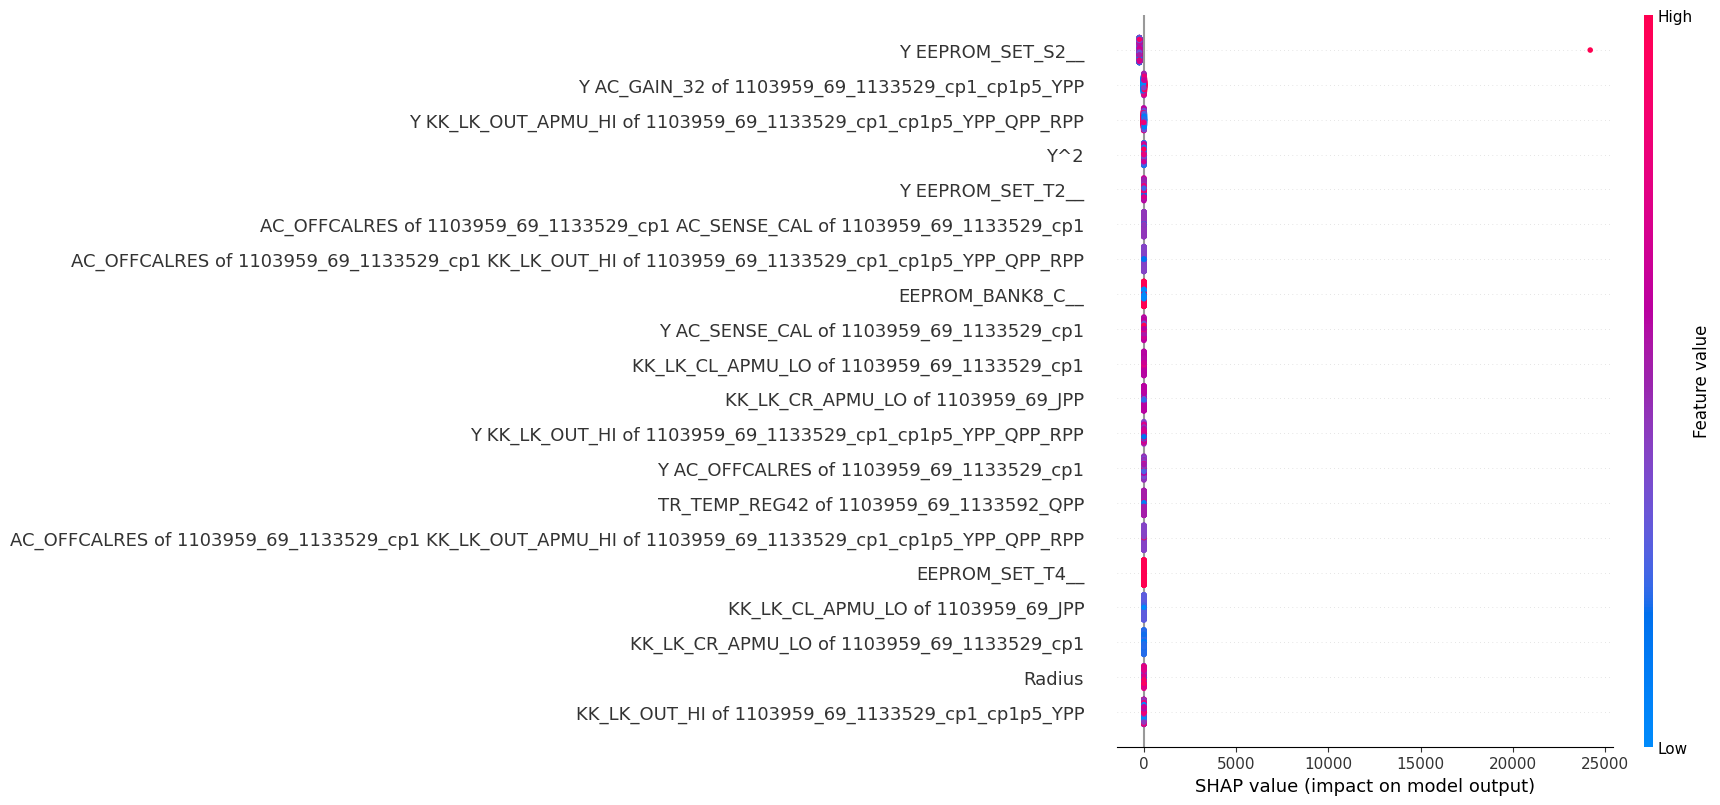

In [ ]:

# shap_values_logistic_regression이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_logistic_regression을 사용하세요.
# shap_values_logistic_regression = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_logistic_regression[0], type(None)):
    print(type(shap_values_logistic_regression[0]))
    print(shap_values_logistic_regression[1].shape)
else:
    shap.summary_plot(shap_values_logistic_regression[0], shap_values_logistic_regression[1])

[2025-08-19 14:54:38.074][Taipy][INFO] job JOB_predict_the_test_data_random_forest_79bd8456-6df6-4c7a-89b2-06a658a19b3b is completed.
[0.         0.         0.72768604 0.39608354 0.         0.89346976
 0.         0.87499732 0.70004221 0.7920665  0.00920941 0.99477748
 0.81060361 0.72762911 0.8565958  0.43285323 0.         0.00921138
 0.         0.80135271 0.30390062 0.         0.         0.51573436
 0.         0.42364957 0.61709593 0.52497349 0.09207309 0.
 0.         0.         0.0091994  0.67233515 0.43281152 0.
 0.62633648 0.         0.         0.93032403 0.         0.0091994
 0.         0.51573851 0.48806359 0.51585551 0.         0.00921425
 0.         0.         0.4144391  0.         0.         0.22097037
 0.         0.80130539 0.         0.59861958 0.30395102 0.
 0.         0.         0.48813942 0.80131156 0.95791207 0.
 0.         0.25787349 0.02762705 0.18420476 0.67233754 0.00921127
 0.         0.34079631 0.02761719 0.56181381 0.         0.01841802
 0.95790792 0.         0.036

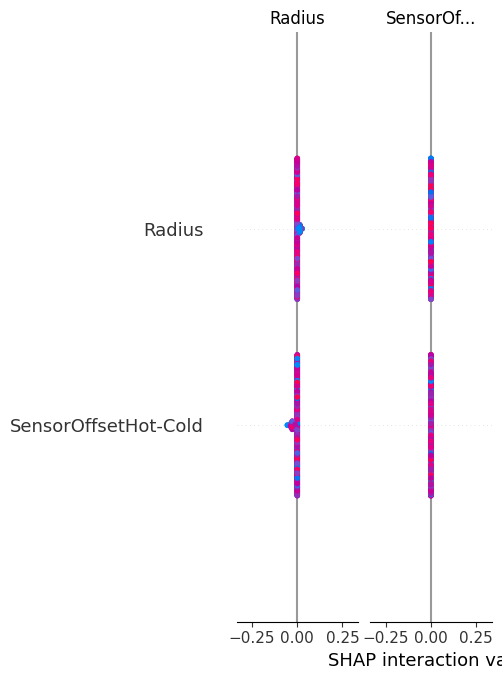

In [ ]:
task = scenario_1.predict_the_test_data_random_forest
task.submit(wait=True, timeout=50)
forecast_dataset_random_forest = scenario_1.forecast_dataset_random_forest.read()
print(forecast_dataset_random_forest)
shap_values_random_forest = scenario_1.shap_values_random_forest.read()

# shap_values_random_forest이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_random_forest을 사용하세요.
# shap_values_random_forest = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_random_forest[0], type(None)):
    print(type(shap_values_random_forest[0]))
    print(shap_values_random_forest[1].shape)
else:
    shap.summary_plot(shap_values_random_forest[0], shap_values_random_forest[1])

[2025-08-19 14:54:40.625][Taipy][INFO] job JOB_predict_the_test_data_xgboost_c0d679de-b89f-439e-ad0a-814abe0ddf3f is completed.
[0.15139808 0.16524908 0.5751094  0.27993178 0.15141958 0.30576897
 0.15139808 0.6276967  0.51150125 0.5903528  0.15141958 0.74714935
 0.6583802  0.4537913  0.667521   0.21733503 0.15139808 0.15082757
 0.15141958 0.6034602  0.18728523 0.15141958 0.15041183 0.4620827
 0.15049893 0.18890852 0.5041244  0.23585308 0.14217462 0.15141958
 0.15478738 0.15141958 0.15141958 0.23187229 0.25409392 0.15141958
 0.18392672 0.15141958 0.15048736 0.7086145  0.15141958 0.15141958
 0.25266346 0.38448828 0.24612252 0.5388676  0.15141958 0.24636291
 0.17143886 0.15141958 0.19365227 0.15141958 0.15029033 0.26061854
 0.15141958 0.37788227 0.15112633 0.3593964  0.15049706 0.15141958
 0.15139808 0.15141958 0.3393012  0.4876787  0.7293409  0.15141958
 0.15141958 0.24067827 0.15141958 0.16867489 0.25354454 0.15141958
 0.15279365 0.18625937 0.15141958 0.18384956 0.15141958 0.15141958
 0

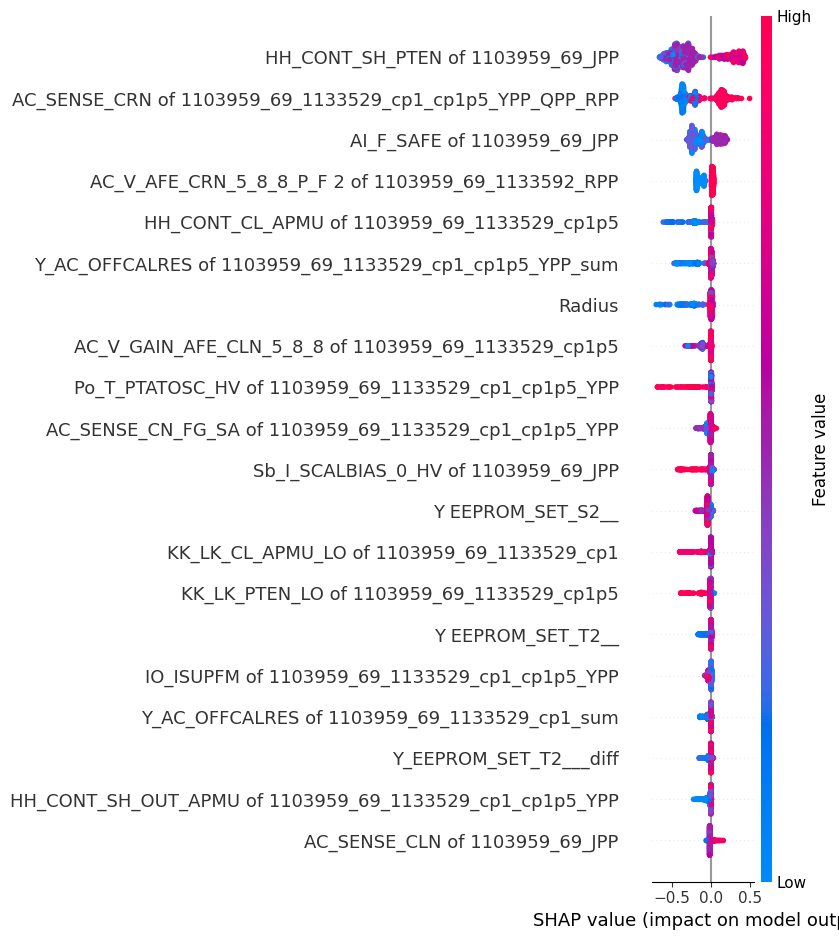

In [ ]:
task = scenario_1.predict_the_test_data_xgboost
task.submit(wait=True, timeout=50)
forecast_dataset_xgboost = scenario_1.forecast_dataset_xgboost.read()
print(forecast_dataset_xgboost)
shap_values_xgboost = scenario_1.shap_values_xgboost.read()

# shap_values_xgboost이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_xgboost을 사용하세요.
# shap_values_xgboost = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_xgboost[0], type(None)):
    print(type(shap_values_xgboost[0]))
    print(shap_values_xgboost[1].shape)
else:
    shap.summary_plot(shap_values_xgboost[0], shap_values_xgboost[1])

### TASKS find_best_threshold

In [ ]:
task = scenario_1.find_best_threshold_baseline
task.submit(wait=True, timeout=50)
train_dataset_proba_baseline = scenario_1.train_dataset_proba_baseline.read()
print(train_dataset_proba_baseline.shape)
threshold_baseline = scenario_1.threshold_baseline.read()
print(threshold_baseline)

[2025-08-19 14:54:44.084][Taipy][INFO] job JOB_find_best_threshold_baseline_80df1680-c21f-477d-a012-f454c4b19610 is completed.
(3617, 1269)
0.010101010101010102


In [ ]:
task = scenario_1.find_best_threshold_logistic_regression
task.submit(wait=True, timeout=50)
train_dataset_proba_logistic_regression = scenario_1.train_dataset_proba_logistic_regression.read()
print(train_dataset_proba_logistic_regression.shape)
threshold_logistic_regression = scenario_1.threshold_logistic_regression.read()
print(threshold_logistic_regression)

[2025-08-19 14:54:46.880][Taipy][INFO] job JOB_find_best_threshold_logistic_regression_fe061730-81f8-4048-9d87-d234563d8149 is completed.
(3617, 1269)
0.7373737373737375


In [ ]:
task = scenario_1.find_best_threshold_random_forest
task.submit(wait=True, timeout=50)
train_dataset_proba_random_forest = scenario_1.train_dataset_proba_random_forest.read()
print(train_dataset_proba_random_forest.shape)
threshold_random_forest = scenario_1.threshold_random_forest.read()
print(threshold_random_forest)

[2025-08-19 14:54:49.730][Taipy][INFO] job JOB_find_best_threshold_random_forest_7b776b2e-1898-4382-be3f-6d252c5b2b67 is completed.
(3617, 1269)
0.7070707070707072


In [ ]:
task = scenario_1.find_best_threshold_xgboost
task.submit(wait=True, timeout=50)
train_dataset_proba_xgboost = scenario_1.train_dataset_proba_xgboost.read()
print(train_dataset_proba_xgboost.shape)
threshold_xgboost = scenario_1.threshold_xgboost.read()
print(threshold_xgboost)

[2025-08-19 14:54:52.519][Taipy][INFO] job JOB_find_best_threshold_xgboost_e74b8776-3d5b-4831-a7b0-388c9d8f751d is completed.
(3617, 1269)
0.6666666666666667


### TASKS roc

In [ ]:
task = scenario_1.task_roc_baseline
task.submit(wait=True, timeout=50)
roc_data_baseline = scenario_1.roc_data_baseline.read()
print(roc_data_baseline.shape)
auc_score_baseline = scenario_1.auc_score_baseline.read()
print(auc_score_baseline)

[2025-08-19 14:54:54.529][Taipy][INFO] job JOB_task_roc_baseline_eed292a7-09f9-403b-a3c5-09eeb183f757 is completed.
(101, 2)
0.5021295252411374


In [ ]:
task = scenario_1.task_roc_logistic_regression
task.submit(wait=True, timeout=50)
roc_data_logistic_regression = scenario_1.roc_data_logistic_regression.read()
print(roc_data_logistic_regression.shape)
auc_score_logistic_regression = scenario_1.auc_score_logistic_regression.read()
print(auc_score_logistic_regression)

[2025-08-19 14:54:56.901][Taipy][INFO] job JOB_task_roc_logistic_regression_ba6d261e-692c-4854-8437-ed086c28a8b1 is completed.
(101, 2)
0.8501503194287862


In [ ]:
task = scenario_1.task_roc_random_forest
task.submit(wait=True, timeout=50)
roc_data_random_forest = scenario_1.roc_data_random_forest.read()
print(roc_data_random_forest.shape)
auc_score_random_forest = scenario_1.auc_score_random_forest.read()
print(auc_score_random_forest)

[2025-08-19 14:54:59.080][Taipy][INFO] job JOB_task_roc_random_forest_597f7054-980c-4e1d-b792-bebedb6c6a21 is completed.
(101, 2)
0.8466428660904421


In [ ]:
task = scenario_1.task_roc_xgboost
task.submit(wait=True, timeout=50)
roc_data_xgboost = scenario_1.roc_data_xgboost.read()
print(roc_data_xgboost.shape)
auc_score_xgboost = scenario_1.auc_score_xgboost.read()
print(auc_score_xgboost)

[2025-08-19 14:55:01.262][Taipy][INFO] job JOB_task_roc_xgboost_80b7d744-8674-4d58-8875-6b5bc65bdc33 is completed.
(101, 2)
0.8509645496680446


### TASKS create_metrics_on_train

In [ ]:
task = scenario_1.create_metrics_on_train_baseline
task.submit(wait=True, timeout=50)
train_dataset_metrics_baseline = scenario_1.train_dataset_metrics_baseline.read()
print(train_dataset_metrics_baseline.shape)

[2025-08-19 14:55:02.994][Taipy][INFO] job JOB_create_metrics_on_train_baseline_48198e29-e426-4ec4-9fe6-fb48eef99281 is completed.
(3617, 1271)


In [ ]:
task = scenario_1.create_metrics_on_train_logistic_regression
task.submit(wait=True, timeout=50)
train_dataset_metrics_logistic_regression = scenario_1.train_dataset_metrics_logistic_regression.read()
print(train_dataset_metrics_logistic_regression.shape)

[2025-08-19 14:55:04.626][Taipy][INFO] job JOB_create_metrics_on_train_logistic_regression_76ed8880-df5e-4430-b051-80785f49eb01 is completed.
(3617, 1271)


In [ ]:
task = scenario_1.create_metrics_on_train_random_forest
task.submit(wait=True, timeout=50)
train_dataset_metrics_random_forest = scenario_1.train_dataset_metrics_random_forest.read()
print(train_dataset_metrics_random_forest.shape)


[2025-08-19 14:55:05.940][Taipy][INFO] job JOB_create_metrics_on_train_random_forest_e8dc74a9-8eb3-4ec2-8559-863bc937d948 is completed.
(3617, 1271)


In [ ]:
task = scenario_1.create_metrics_on_train_xgboost
task.submit(wait=True, timeout=50)
train_dataset_metrics_xgboost = scenario_1.train_dataset_metrics_xgboost.read()
print(train_dataset_metrics_xgboost.shape)

[2025-08-19 14:55:07.235][Taipy][INFO] job JOB_create_metrics_on_train_xgboost_4b93afd5-eaa1-4dde-853a-cf4fc46e4aae is completed.
(3617, 1271)


### TASKS task_create_metrics

In [ ]:
task = scenario_1.task_create_metrics_baseline
task.submit(wait=True, timeout=1)
metrics_baseline = scenario_1.metrics_baseline.read()
for key, value in metrics_baseline.items(): print(f'{key}: {value}')

[2025-08-19 14:55:08.549][Taipy][INFO] job JOB_task_create_metrics_baseline_40da56ea-47db-424d-9724-a672b036cb26 is completed.
f1_score: 0.04
recall: 0.56
precision: 0.02
accuracy: 0.45
auc_score: 0.5
dict_ftpn: {'tp': np.int64(10), 'tn': np.int64(398), 'fp': np.int64(489), 'fn': np.int64(8)}
number_of_predictions: 905
number_of_good_predictions: 408
number_of_false_predictions: 497


In [ ]:
task = scenario_1.task_create_metrics_logistic_regression
task.submit(wait=True, timeout=1)
metrics_logistic_regression = scenario_1.metrics_logistic_regression.read()
for key, value in metrics_logistic_regression.items(): print(f'{key}: {value}')

[2025-08-19 14:55:09.903][Taipy][INFO] job JOB_task_create_metrics_logistic_regression_ae766499-0c50-4505-8a36-4fc3192ca5c1 is completed.
f1_score: 0.1
recall: 0.72
precision: 0.05
accuracy: 0.75
auc_score: 0.85
dict_ftpn: {'tp': np.int64(13), 'tn': np.int64(662), 'fp': np.int64(225), 'fn': np.int64(5)}
number_of_predictions: 905
number_of_good_predictions: 675
number_of_false_predictions: 230


In [ ]:
task = scenario_1.task_create_metrics_random_forest
task.submit(wait=True, timeout=1)
metrics_random_forest = scenario_1.metrics_random_forest.read()
for key, value in metrics_random_forest.items(): print(f'{key}: {value}')

[2025-08-19 14:55:11.223][Taipy][INFO] job JOB_task_create_metrics_random_forest_664c1ac1-4b4a-440a-9364-c71595fc9989 is completed.
f1_score: 0.15
recall: 0.67
precision: 0.08
accuracy: 0.85
auc_score: 0.85
dict_ftpn: {'tp': np.int64(12), 'tn': np.int64(753), 'fp': np.int64(134), 'fn': np.int64(6)}
number_of_predictions: 905
number_of_good_predictions: 765
number_of_false_predictions: 140


In [ ]:
task = scenario_1.task_create_metrics_xgboost
task.submit(wait=True, timeout=1)
metrics_xgboost = scenario_1.metrics_xgboost.read()
for key, value in metrics_xgboost.items(): print(f'{key}: {value}')

[2025-08-19 14:55:12.773][Taipy][INFO] job JOB_task_create_metrics_xgboost_8028ae23-5bbb-4550-86d5-9c12e8a0ee21 is completed.
f1_score: 0.05
recall: 0.06
precision: 0.04
accuracy: 0.95
auc_score: 0.85
dict_ftpn: {'tp': np.int64(1), 'tn': np.int64(863), 'fp': np.int64(24), 'fn': np.int64(17)}
number_of_predictions: 905
number_of_good_predictions: 864
number_of_false_predictions: 41


### TASKS task_create_results

In [ ]:
task = scenario_1.task_create_results_baseline
task.submit(wait=True, timeout=1)
results_baseline = scenario_1.results_baseline.read()
print(results_baseline.shape)

[2025-08-19 14:55:14.308][Taipy][INFO] job JOB_task_create_results_baseline_57e517b3-2cfa-4081-bd1d-ea241c407f57 is completed.
(905, 5)


In [ ]:
task = scenario_1.task_create_results_logistic_regression
task.submit(wait=True, timeout=1)
results_logistic_regression = scenario_1.results_logistic_regression.read()
print(results_logistic_regression.shape)

[2025-08-19 14:55:15.828][Taipy][INFO] job JOB_task_create_results_logistic_regression_e3e4c87d-6689-4e36-b6b1-01833cc1d566 is completed.
(905, 5)


In [ ]:
task = scenario_1.task_create_results_random_forest
task.submit(wait=True, timeout=1)
results_random_forest = scenario_1.results_random_forest.read()
print(results_random_forest.shape)

[2025-08-19 14:55:17.133][Taipy][INFO] job JOB_task_create_results_random_forest_d8986109-c20d-4671-b511-d6f080f62c10 is completed.
(905, 5)


In [ ]:
task = scenario_1.task_create_results_xgboost
task.submit(wait=True, timeout=1)
results_xgboost = scenario_1.results_xgboost.read()
print(results_xgboost.shape)

[2025-08-19 14:55:18.559][Taipy][INFO] job JOB_task_create_results_xgboost_68ea4ad4-4066-4677-82e9-0263502edc6e is completed.
(905, 5)


In [ ]:
# scenarios = tp.get_entities_by_config_id(tp.get_scenarios()[0])
# print(scenarios)
# scenario = scenarios[0]

In [ ]:
# print_object_attributes(scenario)

In [ ]:
# print(scenario.get_inputs())
# print(scenario.get_outputs())

In [ ]:
# input_nodes = scenario.get_inputs()
# output_nodes = scenario.get_outputs()

In [ ]:
# input_node_1 = list(input_nodes)[0]
# output_node_1 = list(output_nodes)[0]
# # output_node_1 = list(output_node_1)[0].read()


In [ ]:
# list(output_nodes)[0]
# print_object_attributes(list(output_nodes)[0])

In [ ]:
# for o_n in list(output_nodes):
#     # print(o_n._config_id )
#     if o_n._config_id.startswith('results_'): 
#         print(o_n._config_id)

# # o_n_1.read()

In [ ]:
# print_object_attributes(input_node_1)

In [ ]:
# print_object_attributes(output_node_1)

In [ ]:
# for i in list(outputs):
#     a=i.read()
#     print(type(a))
    

In [ ]:
# a = tp.get_entities_by_config_id(list(scenario_1.data_nodes)[0])

In [ ]:
# a[0].read()

In [ ]:
# for i in scenario_1.get_outputs(): print(i)

In [ ]:
# list(scenario_1.data_nodes.keys())

In [ ]:
# print([(s.name, s.get_outputs().read()) for s in tp.get_scenarios()])